In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# %run ./Combined-fxns-single-2D.ipynb
# %run ./MSD-fxns.ipynb

SyntaxError: invalid syntax (2749969775.py, line 1)

In [ ]:
# elsevier search of VCF
# https://www.sciencedirect.com/topics/chemistry/velocity-autocorrelation-function

# VCF Function

In [2]:
def VCF(dataset):
    VCF_values = np.zeros(int(len(dataset)/3)) #need at least 3 points to find 2 vectors and angle between
    
    for i in range(1,int(len(dataset)/3)+1):
        interval = i
        diff = difference_indep(dataset,interval=interval)
        cosines=np.zeros(len(diff)-1)
        
        for j in range(1,len(diff)): #was len(diff)-1
            cosines[j-1]=np.dot(diff[j],diff[j-1])/(np.linalg.norm(diff[j])*np.linalg.norm(diff[j-1]))
            
        final = cosines.mean()
        VCF_values[i-1] = final
        
    VCF_values = VCF_values[~np.isnan(VCF_values)]

    return(VCF_values)

In [3]:
def VCF2(dataset):
    VCF_values = [] #np.zeros(int(len(dataset)/3)) #need at least 3 points to find 2 vectors and angle between
    #print(len(VCF_values))
    #print('path length is :', len(dataset))
    #print('########')
    for i in range(1,int(len(dataset)/2)): #or divided by 3 and plus 1
        interval = i
        #print('interval is ',i)
        diff = difference_indep2(dataset,interval=interval)
        #print('num of samples is', len(diff))
        cosines= [] #np.zeros(len(diff)-1) 
        
        for j in range(1,int(len(diff)/2)+1): 
            #cosines[j-1]=np.dot(diff[j],diff[j-1])/(np.linalg.norm(diff[j])*np.linalg.norm(diff[j-1]))
            cosines.append(np.dot(diff[j],diff[j-1])/(np.linalg.norm(diff[j])*np.linalg.norm(diff[j-1])))

        #print(len(cosines), 'cosines are :' ,cosines)
        #print(len(cosines))

        cosines=np.asarray(cosines)
        final = cosines.mean()
        #print('VCF is: ', final)
        #VCF_values[i-1] = final
        VCF_values.append(final)
        #print('--------')
        
    #VCF_values = VCF_values[~np.isnan(VCF_values)]
    VCF_values=np.asarray(VCF_values)
    return(VCF_values)

In [ ]:
#angles should be [-3pi/4, 0, 2*pi/5 ? , 0, pi/4]

In [47]:
# plt.plot(np.linspace(0,np.pi*2,100),np.cos(np.linspace(0,np.pi*2,100)))
# plt.scatter(0,np.cos(0)); plt.scatter(np.pi/4,np.cos(np.pi/4))
# plt.scatter(np.pi/2,np.cos(np.pi/2)); plt.scatter(3*np.pi/4,np.cos(3*np.pi/4))
# plt.scatter(np.pi,np.cos(np.pi)); plt.scatter(3*np.pi/2,np.cos(3*np.pi/2)); plt.scatter(np.pi*2, np.cos(np.pi*2))

In [4]:
def VCF3(dataset):
    VCF_values = [] #np.zeros(int(len(dataset)/3)) #need at least 3 points to find 2 vectors and angle between

    for i in range(1,int(len(dataset)/2)): #or divided by 3 and plus 1
        interval = i

        diff = difference_indep2(dataset,interval=interval)

        cosines= [] 
        
        for j in range(1,int(len(diff))): 

            cosines.append(np.dot(diff[j],diff[j-1])/(np.linalg.norm(diff[j])*np.linalg.norm(diff[j-1])))

        cosines=np.asarray(cosines)
        final = cosines.mean()

        VCF_values.append(final)#,len(cosines)])

    VCF_values=np.asarray(VCF_values)
    return(VCF_values)

In [1]:
# x=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]; y=[0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10]; 
# df=pd.DataFrame({'X':x, 'Y':y}); 
# plt.plot(x,y); plt.scatter(x,y,c='k'); plt.xlim(-1,5)

In [2]:
#VCF3(df)

In [52]:
#VCF2(df)

array([-0.70710678,  1.        ,  0.31622777,  1.        ,  0.70710678,
        1.        ,  0.84366149,  1.        ,  0.90373784,  1.        ])

In [12]:
#VCF_Test_V6_a = pd.read_csv("VCF_Test_V6_a.csv")


In [38]:
#vcf2test=VCF2(VCF_Test_V6_a[VCF_Test_V6_a['test']==3])
#vcf3test=VCF3(VCF_Test_V6_a[VCF_Test_V6_a['test']==3])

/nas/longleaf/apps/anaconda/2019.10.ood/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/nas/longleaf/apps/anaconda/2019.10.ood/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


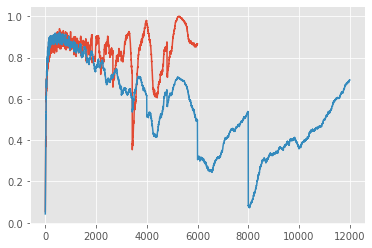

In [40]:
#plt.plot(vcf2test, label='vcf2')
#plt.plot(vcf3test, label= 'vcf3')
#plt.plot(vcf2test-vcf3test)

In [35]:
#path=VCF_Test_V6_a[VCF_Test_V6_a['test']==3]

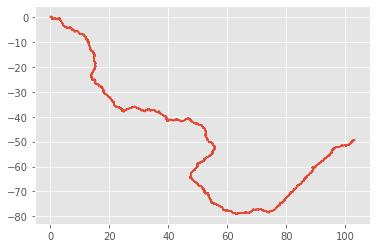

In [36]:
#plt.plot(path['X'], path['Y'])

In [ ]:
# x=[1,0,1,0]; y=[0,0,1,1]
# VCF2(df)[0]==-0.7071067811865475
# x=[1,0,1,0]; y=[0,0,1,1]
# VCF2(df)[0]==-0.7071067811865475